# New york stock exchange

### 1. Importing the data and libraries

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # makes pandas show all the columns of the dataframe instead of ...
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../data/prices-split-adjusted.csv")

### 2. understanding the data

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.shape

(851264, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["symbol"].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [10]:
df = df[df["symbol"] == "XOM"] # selecting XOM "ExxonMobil" as our stock

In [11]:
df.head()

,date,symbol,open,close,low,high,volume
710,2010-01-04,XOM,68.720001,69.150002,68.190002,69.260002,27809100.0
1178,2010-01-05,XOM,69.190002,69.419998,68.800003,69.449997,30174700.0
1646,2010-01-06,XOM,69.449997,70.019997,69.339996,70.599998,35044700.0
2114,2010-01-07,XOM,69.900002,69.800003,69.419998,70.059998,27192100.0
2582,2010-01-08,XOM,69.690002,69.519997,69.220001,69.750000,24891800.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 710 to 851253
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


<AxesSubplot: >

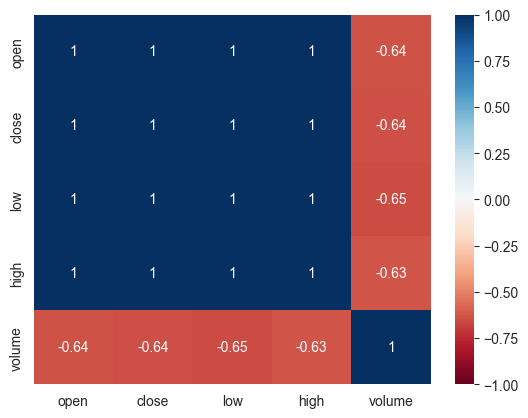

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap="RdBu", vmin= -1, vmax= 1, annot=True)

now let's select the features that have a good correlation which we will use to train our model

In [14]:
corr_target = abs(corr["close"]) # Absolute value of correlation
relevant_features = corr_target[corr_target > 0.2] # highly correlated features
names = [index for index, value in relevant_features.iteritems()] # getting the names of the features
names.remove("close") # removing the target feature

print(names) # printing the features
print(len(names)) # total number of features

['open', 'low', 'high', 'volume']
4


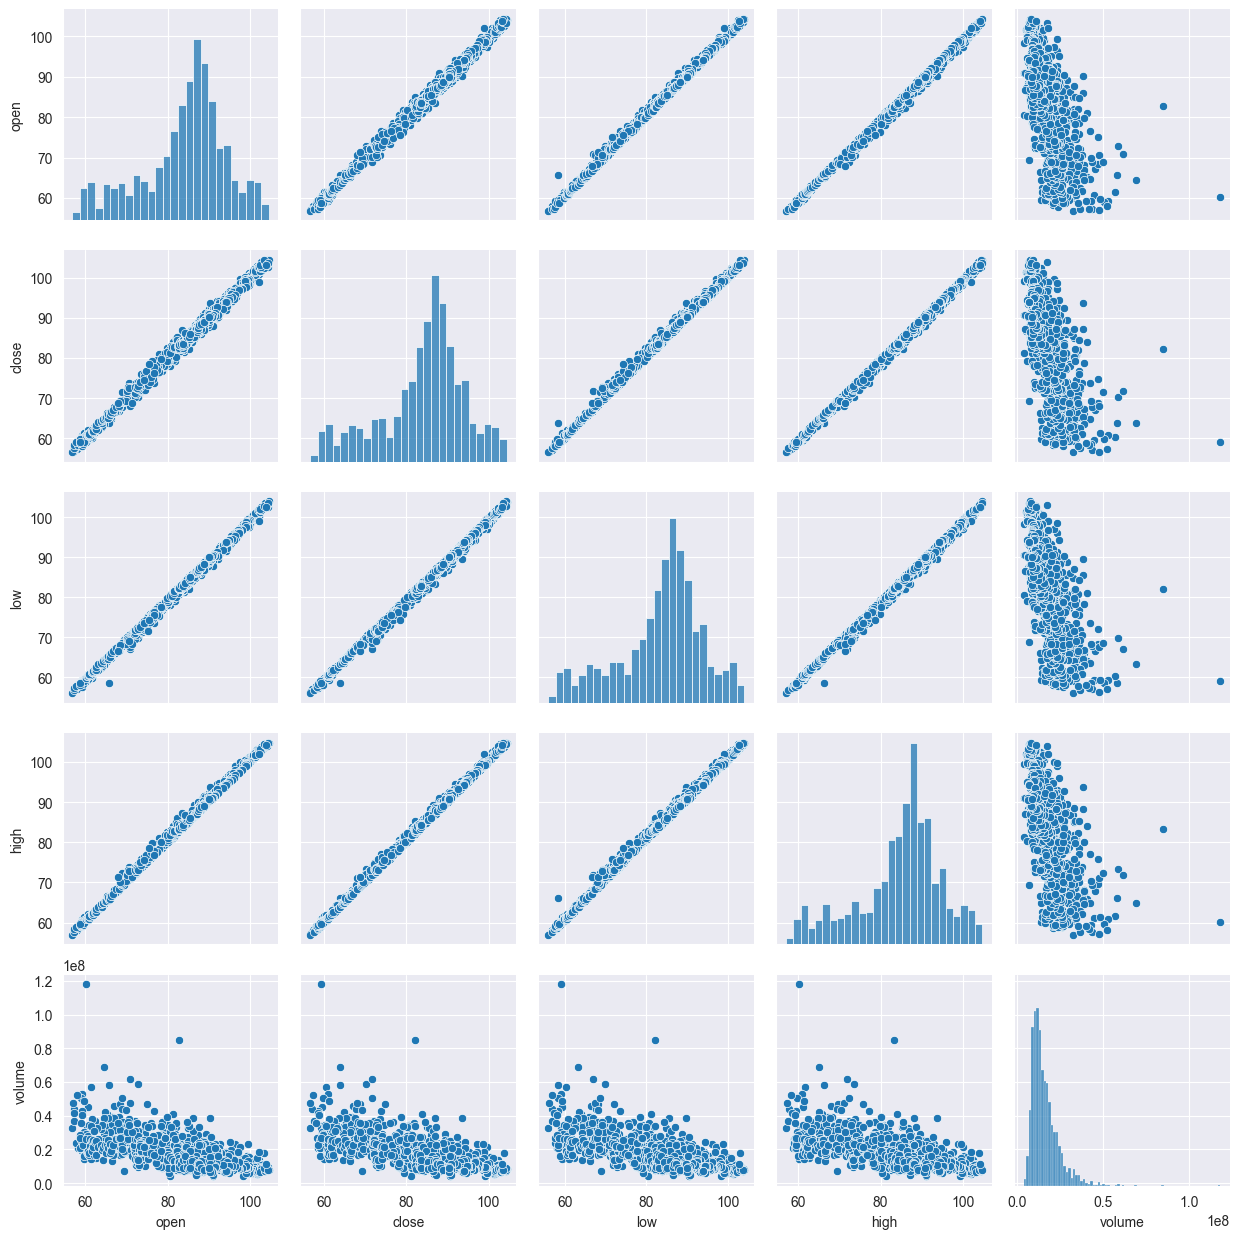

In [15]:
sns.pairplot(df)
plt.tight_layout()

Skewness: -0.639227
Kurtosis: 0.009485


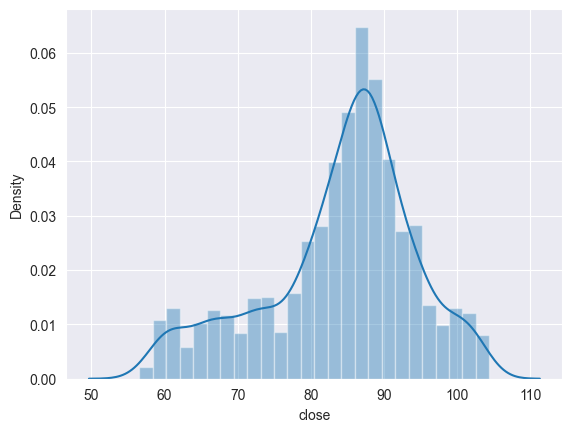

In [16]:
sns.distplot(df["close"])
print("Skewness: %f" % df["close"].skew())
print("Kurtosis: %f" % df["close"].kurt())

### 3. Modeling

In [17]:
cols = ["date","close","symbol"]
X = df.drop(cols, axis= 1)
y = df["close"]

In [18]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
X.head()

,open,low,high,volume
0,0.249527,0.255155,0.256856,0.207721
1,0.259407,0.267861,0.260833,0.228496
2,0.264873,0.279108,0.284907,0.271265
3,0.274333,0.280775,0.273603,0.202302
4,0.269918,0.276609,0.267113,0.182100


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print("X_train:- ", X_train.shape)
print("X_test:- ", X_test.shape)
print("y_train:- ", y_train.shape)
print("y_test:- ", y_test.shape)

X_train:-  (1409, 4)
X_test:-  (353, 4)
y_train:-  (1409,)
y_test:-  (353,)


Linear Regression

In [20]:
lr = LinearRegression().fit(X_train, y_train)

In [21]:
lr_y_pred = lr.predict(X_test)

In [22]:
lr_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_y_pred})
lr_pred_df.head()

,Actual,Predicted
586703,95.610001,94.931287
390598,87.449997,86.828270
486253,95.110001,95.753843
721887,77.260002,77.217566
182771,83.629997,83.513396


In [23]:
print("R2 score:- %f" % r2_score(y_test, lr_y_pred))
print("MSE:- %f" % mean_squared_error(y_test, lr_y_pred))
print("RMSE:- %f" % np.sqrt(mean_squared_error(y_test, lr_y_pred)))

R2 score:- 0.998245
MSE:- 0.185448
RMSE:- 0.430637


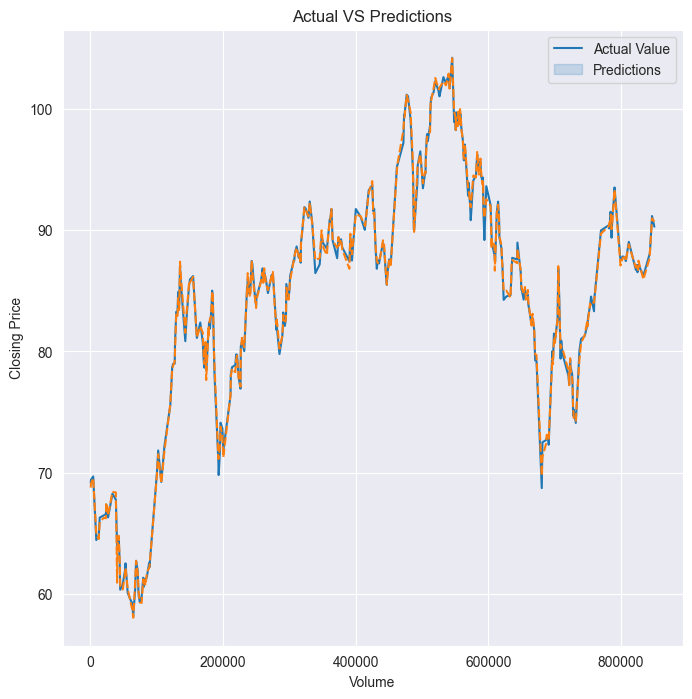

In [24]:
plt.figure(figsize=(8,8))
plt.xlabel('Volume', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
sns.lineplot(lr_pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.title("Actual VS Predictions")
plt.show()

Lasso

In [25]:
la = Lasso().fit(X_train, y_train)

In [26]:
la_y_pred = la.predict(X_test)

In [27]:
la_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': la_y_pred})
la_pred_df.head()

,Actual,Predicted
586703,95.610001,89.984913
390598,87.449997,85.737762
486253,95.110001,89.903340
721887,77.260002,80.582454
182771,83.629997,83.361319


In [28]:
print("R2 score:- %f" % r2_score(y_test, la_y_pred))
print("MSE:- %f" % mean_squared_error(y_test, la_y_pred))
print("RMSE:- %f" % np.sqrt(mean_squared_error(y_test, la_y_pred)))

R2 score:- 0.787609
MSE:- 22.437275
RMSE:- 4.736800


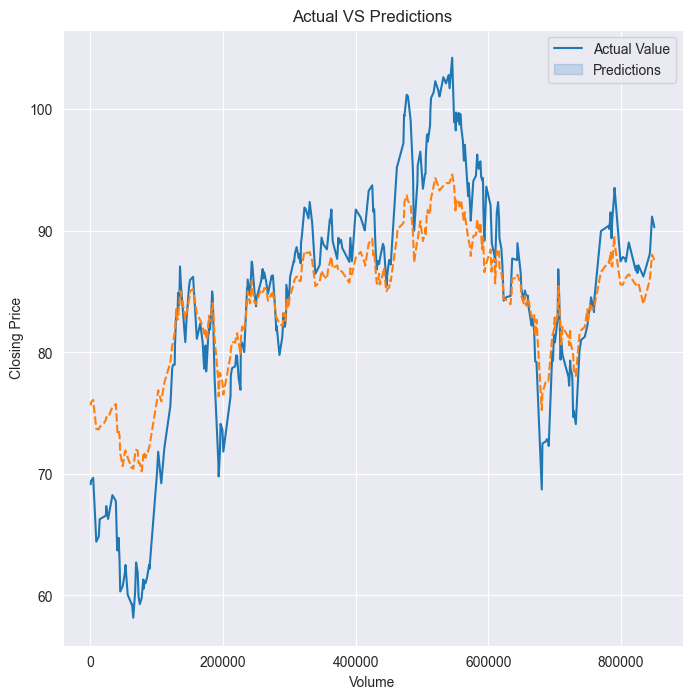

In [29]:
plt.figure(figsize=(8,8))
plt.xlabel('Volume', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
sns.lineplot(la_pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.title("Actual VS Predictions")
plt.show()

Ridge

In [30]:
ri = Ridge().fit(X_train, y_train)

In [31]:
ri_y_pred = ri.predict(X_test)

In [32]:
ri_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': ri_y_pred})
ri_pred_df.head()

,Actual,Predicted
586703,95.610001,94.973146
390598,87.449997,87.030923
486253,95.110001,95.242906
721887,77.260002,77.606222
182771,83.629997,83.215659


In [33]:
print("R2 score:- %f" % r2_score(y_test, ri_y_pred))
print("MSE:- %f" % mean_squared_error(y_test, ri_y_pred))
print("RMSE:- %f" % np.sqrt(mean_squared_error(y_test, ri_y_pred)))

R2 score:- 0.997137
MSE:- 0.302463
RMSE:- 0.549967


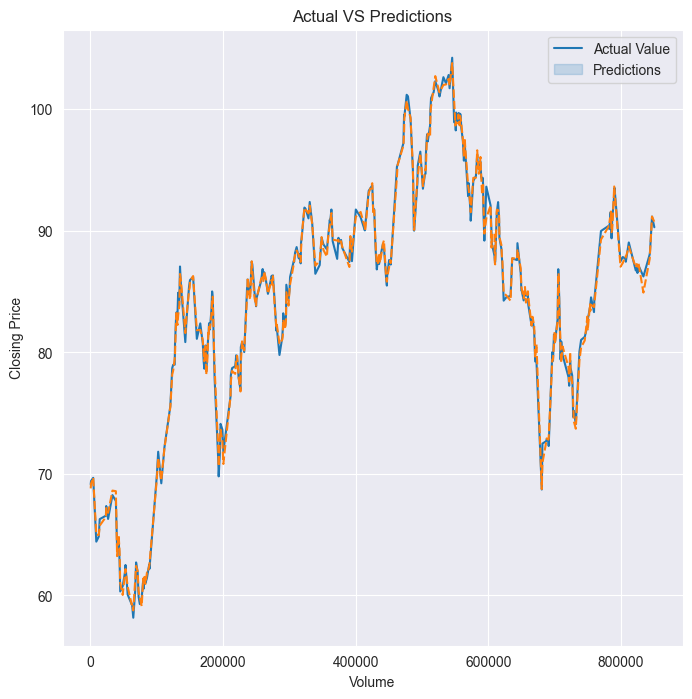

In [34]:
plt.figure(figsize=(8,8))
plt.xlabel('Volume', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
sns.lineplot(ri_pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.title("Actual VS Predictions")
plt.show()

The model that performed the best was Linear Regression so we will use that one for future predictions.

In [35]:
# Saving the model
from joblib import dump, load

In [36]:
# dump(lr,"lr-stockPredicitionModel.joblib")